In [1]:

!pip install yfinance==0.1.63

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Load the dataset by escaping backslashes
file_path = 'C:\\Users\\Kenny\\Desktop\\7th sem mini\\Data.csv'

df = pd.read_csv(file_path, parse_dates=['From Date'], dayfirst=True)


In [5]:
print(df.head())

   SL NO           From Date  PM2.5   PM10    NO   NO2    Nox    NH3    SO2  \
0      1 2019-02-18 00:00:00  58.04  81.06  1.81   6.4   9.66  27.18  13.77   
1      2 2019-02-18 01:00:00     60  82.39  1.91  6.08    9.7  26.46  13.64   
2      3 2019-02-18 02:00:00   55.5  73.42  2.22  6.71  10.86  27.06  13.64   
3      4 2019-02-18 03:00:00  66.56  96.04  2.79     7   12.1  26.34  13.72   
4      5 2019-02-18 04:00:00  67.08  97.21  3.29  9.45  15.53  25.16   13.8   

     CO  Ozone Benzene Eth-Benzene MP-Xylene    WS      WD    SR       BP  \
0  0.49  15.73    0.92        None      0.33  1.86  229.44  0.22  1002.19   
1  0.44  18.36    0.84        None      0.29  1.54   217.2  1.46      956   
2  0.44  34.54    0.77        None      0.23  0.66  197.21  None   1001.6   
3  0.45  31.85    0.82        None      0.21  0.61  206.44  None  1001.41   
4  0.47  24.07    0.74        None      0.22  0.54  230.53  None   980.67   

      AT    RF  
0  20.87     0  
1  18.92  0.24  
2  18.33   

In [6]:
df.replace('None', np.nan, inplace=True)


In [7]:
df.dropna(subset=['PM2.5', 'PM10'], inplace=True)


In [8]:
# Drop rows with NaN values
df.dropna(subset=['PM2.5', 'PM10'], inplace=True)

In [9]:
#Convert to numeric values
df[['PM2.5', 'PM10']] = df[['PM2.5', 'PM10']].astype(float)


In [10]:
# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(df[['PM2.5', 'PM10']])

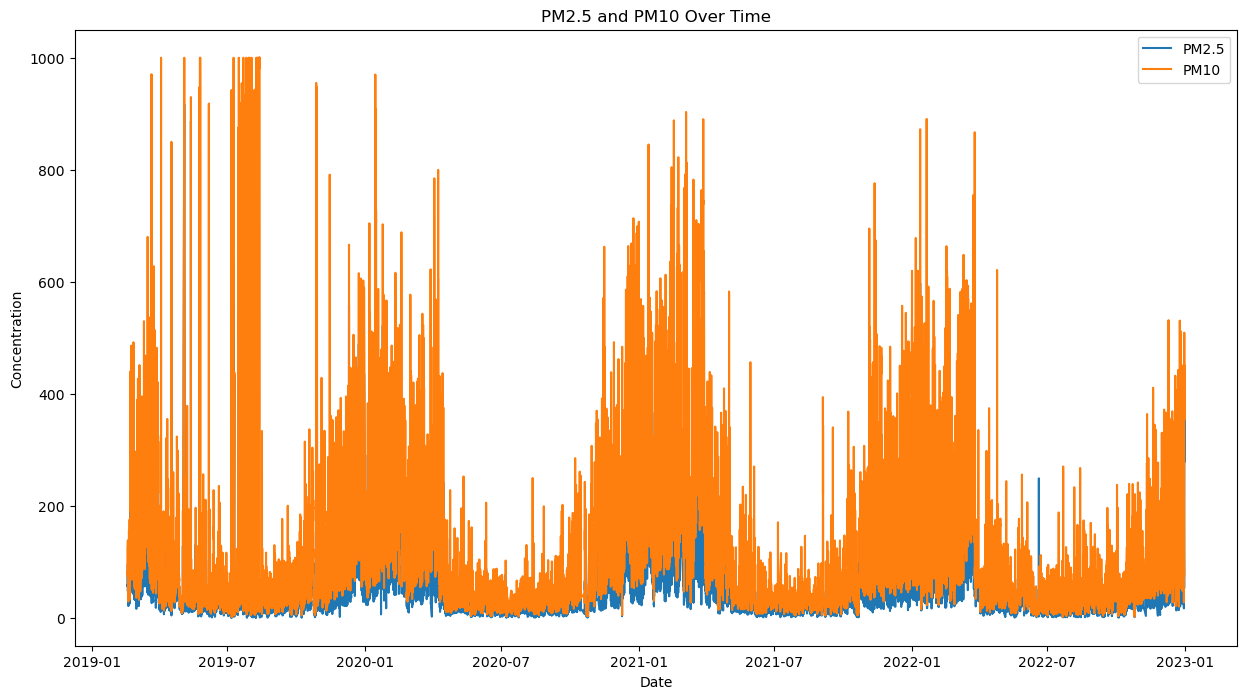

In [11]:
#Plot the time series for PM2.5 and PM10
plt.figure(figsize=(15, 8))
plt.plot(df['From Date'], df['PM2.5'], label='PM2.5')
plt.plot(df['From Date'], df['PM10'], label='PM10')
plt.title('PM2.5 and PM10 Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()

In [12]:
# Define the GAN architecture
def build_generator(latent_dim, output_dim):
    model = Sequential()
    model.add(Dense(100, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(50))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(output_dim, activation='tanh'))
    return model

In [13]:
def build_discriminator(input_dim):
    model = Sequential()
    model.add(Dense(50, input_dim=input_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(25))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [14]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [15]:
# Define parameters
latent_dim = 10
data_dim = data_normalized.shape[1]
sequence_length = 24 

In [16]:
# Build and compile the models
generator = build_generator(latent_dim, data_dim,)
discriminator = build_discriminator(data_dim)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [17]:
# Training the GAN
epochs = 2000
batch_size = 32

for epoch in range(epochs):
    noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
    generated_data = generator.predict(noise)
    real_data = data_normalized[np.random.randint(0, data_normalized.shape[0], batch_size)]

    labels_real = np.ones((batch_size, 1))
    labels_fake = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_data, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_data, labels_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
    labels_gan = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, labels_gan)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")


1/1 [==============================] - 0s 174ms/step
Epoch 0, D Loss: 0.68674236536026, G Loss: 0.7577250003814697
1/1 [==============================] - 0s 20ms/step
Epoch 100, D Loss: 0.49020466208457947, G Loss: 1.351992130279541
1/1 [==============================] - 0s 27ms/step
Epoch 200, D Loss: 0.4373272955417633, G Loss: 1.6502138376235962
1/1 [==============================] - 0s 24ms/step
Epoch 300, D Loss: 0.4844212532043457, G Loss: 1.5077221393585205
1/1 [==============================] - 0s 19ms/step
Epoch 400, D Loss: 0.47109971940517426, G Loss: 1.8286957740783691
1/1 [==============================] - 0s 14ms/step
Epoch 500, D Loss: 0.513719454407692, G Loss: 1.4152871370315552
1/1 [==============================] - 0s 29ms/step
Epoch 600, D Loss: 0.7148047089576721, G Loss: 1.301702857017517
1/1 [==============================] - 0s 20ms/step
Epoch 700, D Loss: 0.5982188731431961, G Loss: 1.1232690811157227
1/1 [==============================] - 0s 20ms/step
Epoch 80

In [19]:
# Generate synthetic data
num_samples = 1000
noise = np.random.normal(0, 1, size=(num_samples, latent_dim))
generated_data = generator.predict(noise)
generated_data = scaler.inverse_transform(generated_data)

32/32 [==============================] - 0s 1ms/step


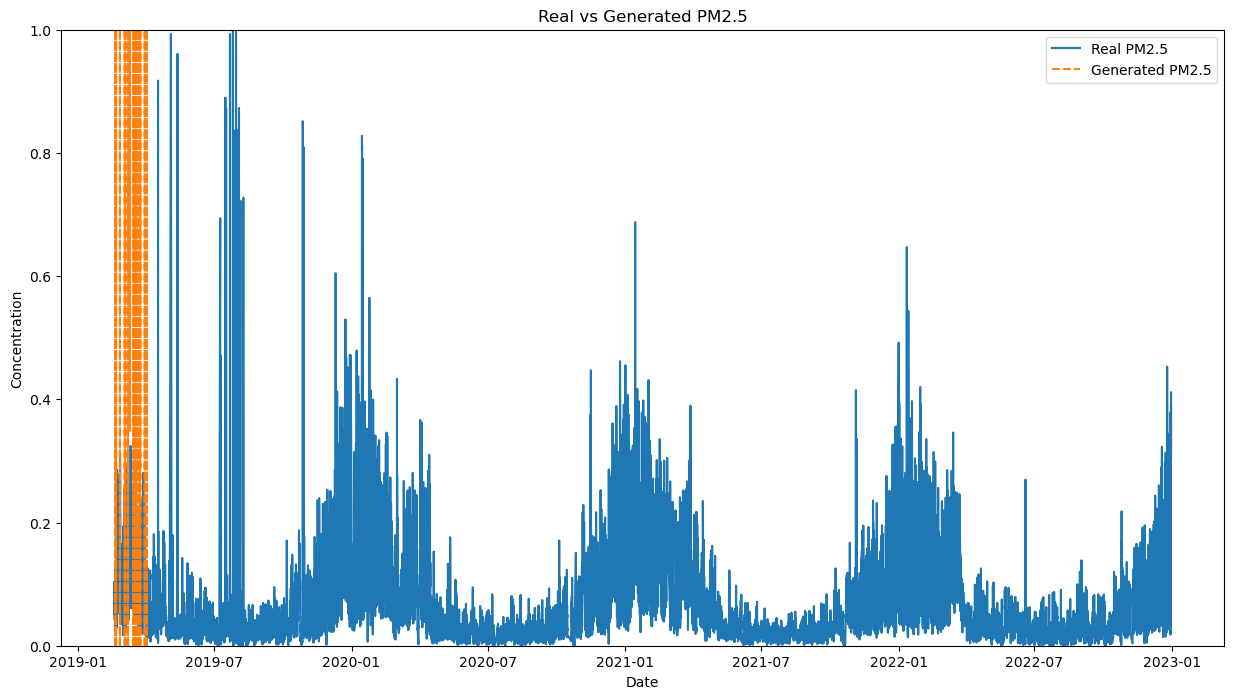

In [20]:
# Plot the generated data
plt.figure(figsize=(15, 8))
plt.plot(df['From Date'], data_normalized[:, 0], label='Real PM2.5')
plt.plot(df['From Date'].iloc[:num_samples], generated_data[:, 0], label='Generated PM2.5', linestyle='--')
plt.title('Real vs Generated PM2.5')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.ylim([0, 1])  # Adjust the y-axis limits
plt.legend()
plt.show()